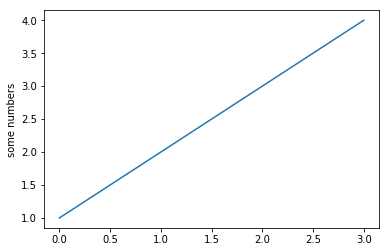

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

plot() is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

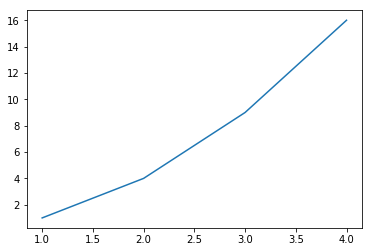

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

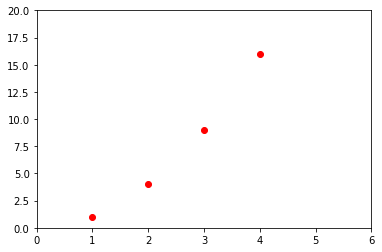

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

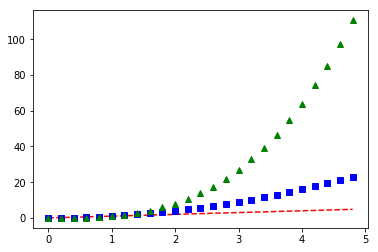

In [6]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Plotting with keyword strings
There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

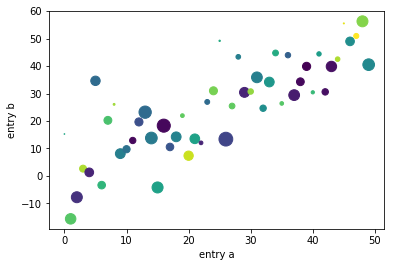

In [7]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Plotting with categorical variables
It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

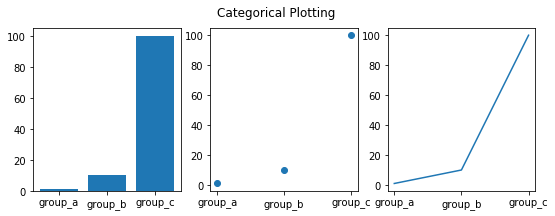

In [9]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Controlling line properties
Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties

* Use keyword args:

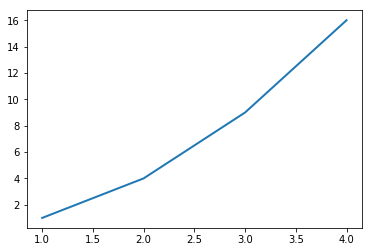

In [11]:
x = [1,2,3,4]
y = [1,4,9,16]
plt.plot(x, y, linewidth=2.0)

* Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:

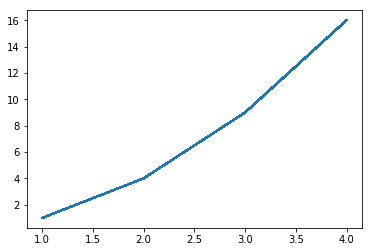

In [12]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

* Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:

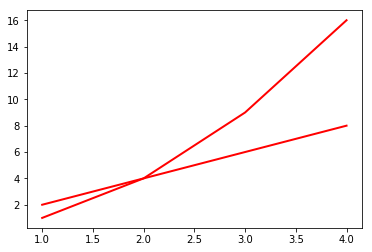

In [17]:
x1, y1 = [1,2,3,4], [2, 4, 6, 8]
x2, y2 = [1,2,3,4], [1, 4, 9, 16]

lines = plt.plot(x1, y1, x2, y2)
# use keyword args
_ = plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
# plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

In [21]:
%%html
<style> table {float:left} </style>

####  Here are the available Line2D properties.

| Property | Value Type | 
| --- | --- |	
| animated | [True \| False] |
| antialiased or aa | [True \| False] |
| clip_box | a matplotlib.transform.Bbox instance |
| clip_on | [True \| False] |
| clip_path | a Path instance and a Transform instance, a Patch |
| color or c | any matplotlib color |
| contains | the hit testing function |
| dash_capstyle | ['butt' | 'round' \| 'projecting'] |
| dash_joinstyle | ['miter' \| 'round' \| 'bevel'] |
| dashes | sequence of on/off ink in points |
| data | (np.array xdata, np.array ydata) |
| figure | a matplotlib.figure.Figure instance |
| label | any string |
| linestyle or ls | [ '-' \| '--' \| '-.' \| ':' \| 'steps' \| ...] |
| linewidth or lw | float value in points |
| marker | [ '+' \| ',' \| '.' \| '1' \| '2' \| '3' \| '4' ] |
| markeredgecolor or mec | any matplotlib color |
| markeredgewidth or mew | float value in points |
| markerfacecolor or mfc | any matplotlib color |
| markersize or ms | float |
| markevery | [ None | integer | (startind, stride) ] |
| picker | used in interactive line selection |
| pickradius | the line pick selection radius |
| solid_capstyle | ['butt' \| 'round' \| 'projecting'] |
| solid_joinstyle | ['miter' \| 'round' \| 'bevel'] |
| transform | a matplotlib.transforms.Transform instance |
| visible | [True \| False] |
| xdata | np.array |
| ydata | np.array |
| zorder | any number |


To get a list of settable line properties, call the setp() function with a line or lines as argument

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  antialiased: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth: float
  marker: unknown
  markeredgecolor: color
  markeredgewidth: float
  markerfacecolor: color
  markerfacecoloralt: color
  markersize: float
  markevery: unknown
  path_effects: `.AbstractPathEffect`
  picker: float or callable[[Arti

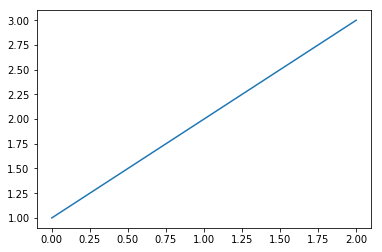

In [18]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

### Working with multiple figures and axes
MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

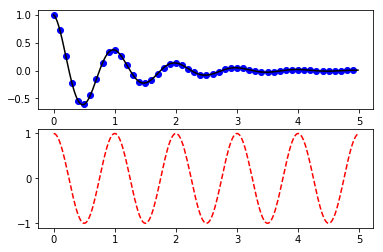

In [22]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don't manually specify any axes. The subplot() command specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrows * numcols. The commas in the subplot command are optional if numrows * numcols < 10. So subplot(211) is identical to subplot(2, 1, 1).

You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use the axes() command, which allows you to specify the location as axes([left, bottom, width, height]) where all values are in fractional (0 to 1) coordinates. See Axes Demo for an example of placing axes manually and Basic Subplot Demo for an example with lots of subplots.

You can create multiple figures by using multiple figure() calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

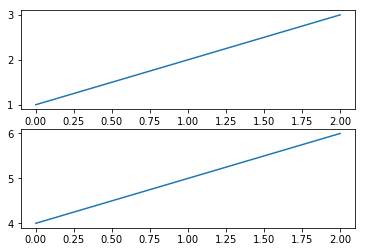

In [27]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
_ = plt.plot([4, 5, 6])

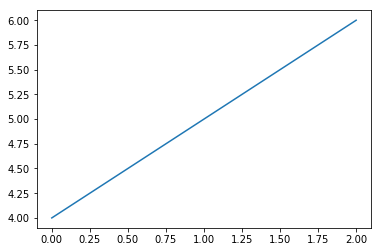

In [28]:
plt.figure(2)                    # a second figure
_ = plt.plot([4, 5, 6])          # creates a subplot(111) by default

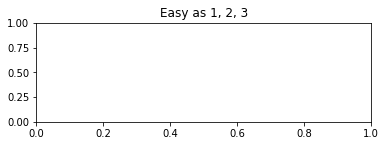

In [29]:
plt.figure(1)                    # figure 1 current; subplot(212) still current
plt.subplot(211)                 # make subplot(211) in figure1 current
_ = plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with clf() and the current axes with cla(). If you find it annoying that states (specifically the current image, figure and axes) are being maintained for you behind the scenes, don't despair: this is just a thin stateful wrapper around an object oriented API, which you can use instead (see Artist tutorial)

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

### Working with text
The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations (see Text in Matplotlib Plots for a more detailed example)

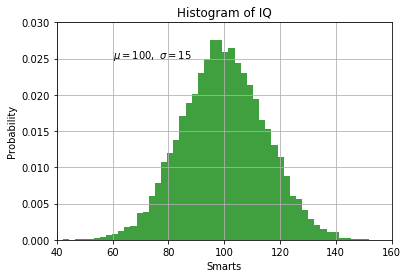

In [32]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the text() commands return an matplotlib.text.Text instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using setp():

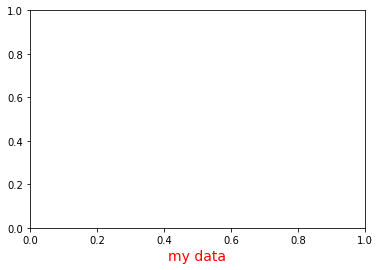

In [34]:
t = plt.xlabel('my data', fontsize=14, color='red')

### Using mathematical expressions in text
matplotlib accepts TeX equation expressions in any text expression. For example to write the expression σi=15 in the title, you can write a TeX expression surrounded by dollar signs:

Text(0.5, 1.0, '$\\sigma_i=15$')

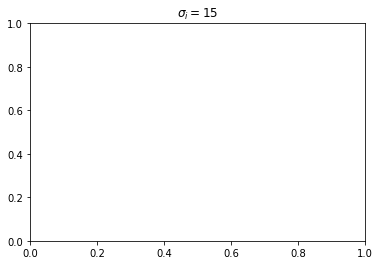

In [35]:
plt.title(r'$\sigma_i=15$')

The r preceding the title string is important -- it signifies that the string is a raw string and not to treat backslashes as python escapes. matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts -- for details see Writing mathematical expressions. Thus you can use mathematical text across platforms without requiring a TeX installation. For those who have LaTeX and dvipng installed, you can also use LaTeX to format your text and incorporate the output directly into your display figures or saved postscript -- see Text rendering With LaTeX.

### Annotating text
The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

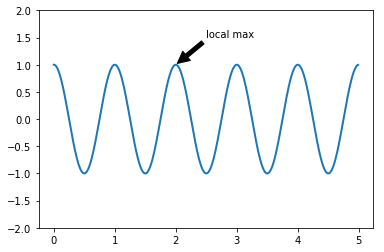

In [44]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(2.5, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('local max', xy=(1.7, 1.1))

plt.ylim(-2, 2)
plt.show()

In this basic example, both the xy (arrow tip) and xytext locations (text location) are in data coordinates. There are a variety of other coordinate systems one can choose -- see Basic annotation and Advanced Annotation for details. More examples can be found in Annotating Plots.

### Logarithmic and other nonlinear axes
matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:

plt.xscale('log')

An example of four plots with the same data and different scales for the y axis is shown below.

In [47]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

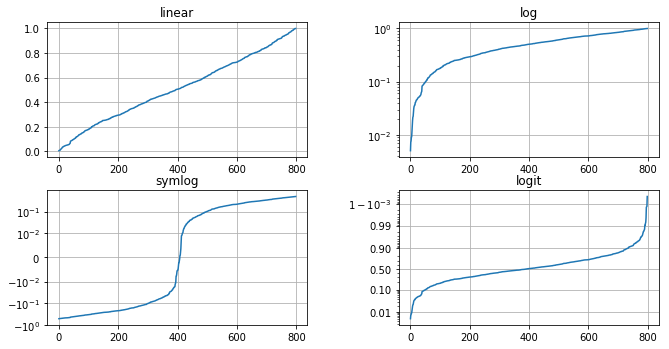

In [48]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()